# Supernovae Ia as standard candles
## 1 Scientific background
At the end of their lives, the most massive stars undergo a sudden collapse which leads to an explosion which can outshine entire galaxies, a supernova. Supernovae (SNe) are among the most powerful events in our universe. They release extreme amounts of energy as well as heavy elements which likely only form during SNe get ejected into space, enriching the ISM and creating building blocks for the formation of new stars.
SNe are divided into Type I and Type II. The difference between them is the abscence of hydrogen (H) lines in the spectra of Type I SNe whereas Type II SNe contain obvious H lines. [2]

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Comparative_supernova_type_light_curves.png?20120604155323">

https://commons.wikimedia.org/wiki/File:Comparative_supernova_type_light_curves.png

## Standard candles
Astronomy is restricted to mostly studying objects from afar. For the most part this means astronomers can only observe the light an object gives them. An important question when you discover something is: "How far away is it?" And when the distances get so high that parallaxes are no longer of use it is up to the light to answer this question. And here standard candles come to benefit. Standard candles are astronomical objects which emit light with a known luminosity. And with this information you only have to measure the apparent luminosity, put it in the distance modulus formula and solve for $d$.

$m-M=5\cdot\log_{10} (d) -5$

where:
- $m$ is the apparent magnitude,
- $M$ is the absolute magnitude,
- $d$ is the distance to the object in parsecs.

An example for standard candles are cepheids which are pulsating stars that change their brightness with a well-defined stable period and amplitude. But at larger distances it is harder to make out single stars inside a galaxy and it demands brighter objects. SNe Ia are such objects. With typical peak luminosities of about $M_{B} = -19.5 \text{mag}$ they can outshine galaxies. [2]

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/typeia1.jpg">

https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova

### How is data collected?
High-quality data collection on Type Ia supernovae (SNe Ia) began with the Calán/Tololo survey in the 1990s, led by Mario Hamuy and colleagues. This foundational survey provided the first systematic dataset for 29 nearby SNe Ia, using CCD photometry to measure light curves and distances up to redshifts of 0.1. Currently, the Harvard-Smithsonian Center for Astrophysics (CfA) manages one of the largest ongoing SNe Ia campaigns at the Fred Lawrence Whipple Observatory (FLWO), where high-quality, multicolor photometric and spectroscopic data have been collected since 1993, expanding the dataset of nearby SNe Ia.

The CfA program relies on a network of amateur and professional astronomers for new SNe discoveries, receiving notifications coordinated by the IAU’s Central Bureau for Astronomical Telegrams. Once a supernova is confirmed and classified, the CfA team conducts follow-up photometry using CCD detectors, tracking each SNe’s brightness over time in multiple passbands (UBVRI) to create light curves. Observations are made over several weeks, covering each supernova’s peak and decline to produce data for accurate distance measurements. Data processing involves photometric calibration, background, and galaxy subtraction to ensure precise light isolation. [1]

### exemplary UBVRI light curves

/tmp/ipykernel_6655/741976297.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2000-09-02' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]


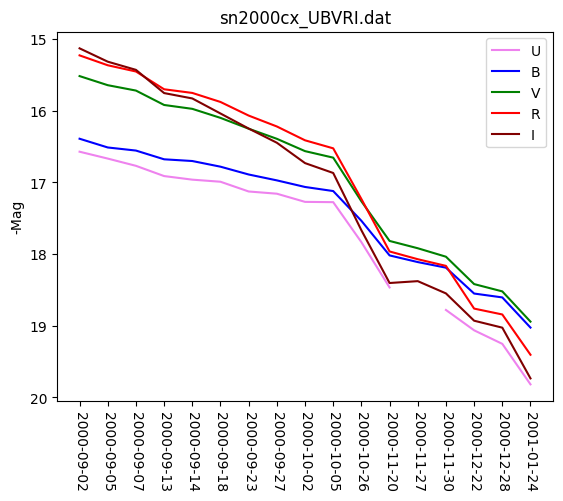

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time

file= "sn2000cx_UBVRI.dat"
df= pd.read_table( file, comment="#", sep="[ ]+", engine="python", header=0, names=["HJD","U","Uerr","B","Berr","V","Verr","R","Rerr","I","Ierr"] )
df[df == 99.999]= float( "NaN" )
for i in df["HJD"].index:
  df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]
for filter, color in [["U","violet"],["B","blue"],["V","green"],["R","red"],["I","#800000"]]:
  plt.plot( df["HJD"].values, df[filter].values, label=filter, color=color )
plt.title( file )
#plt.xlabel( "HJD" )
plt.ylabel( "-Mag" )
plt.legend()
plt.xticks( rotation=270 )
plt.gca().invert_yaxis()
plt.show()


### Supernovae Type Ia
SNe Ia are characterized by a strong ionized silicon absorbtion in their spectra. A large fraction of observed SNe Ia (∼ 70%) is found to show remarkable homogeneity and a clear empirical relationship between light curve width and peak luminosity, the so-called "Phillips relation". These SNe Ia are commonly referred to as "normal SNe Ia" and have been used to determine cosmological parameters, which has led to the discovery of the accelerating expansion of the universe.
Sne Ia are widely thought to be thermonuclear explosions of white dwarfs in binary systems. However, there is no agreement on the fundamental aspects of the nature of the progenitor systems (i.e. the stars from which SNe Ia arise) and their explosion mechanism neither from theoretical nor observational side. [2]

<img src="https://www.schoolsobservatory.org/sites/default/files/discover/supernovaeproject/Type%20Ia.jpg">

https://www.schoolsobservatory.org/learn/astro/stars/cycle/ia_supernova

## 2 Data Distributions

### Plot of all the SNe light curves

To get an overview of what's going on, we plotted out all data files that contained values of the apparent luminosity for all five filters (U,B,V,R,I) and with at least 20 observations. Since the data files contained error margins for the values of the light intensities, we made them visible with error bars.

The error bars show that the measurements were not taken at regular intervals. In some cases, the intervals are greater than 100 days, making them difficult to compare.

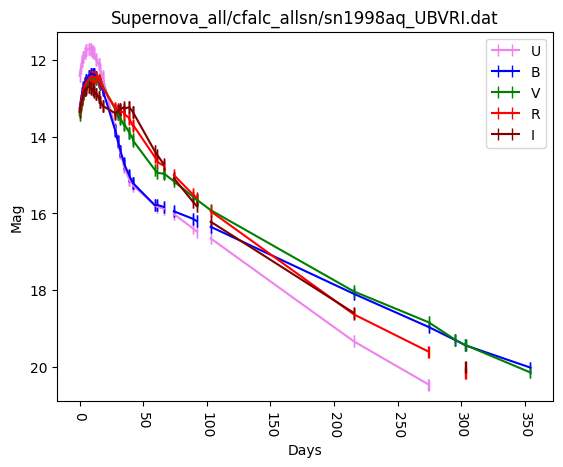

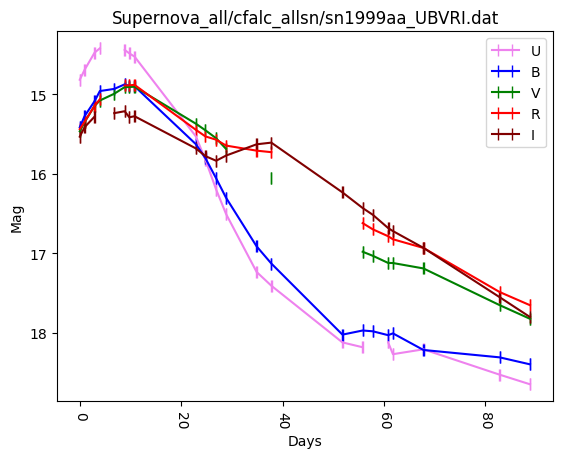

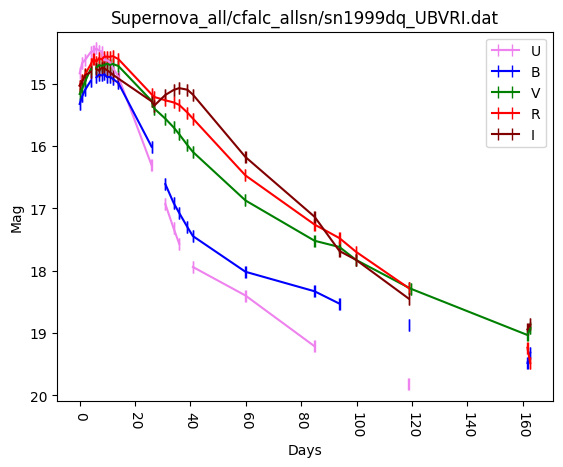

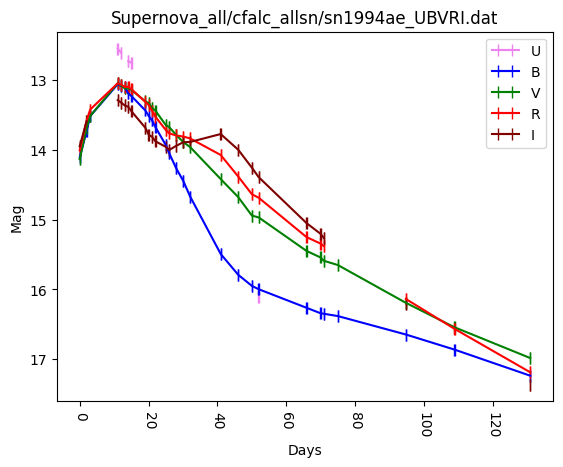

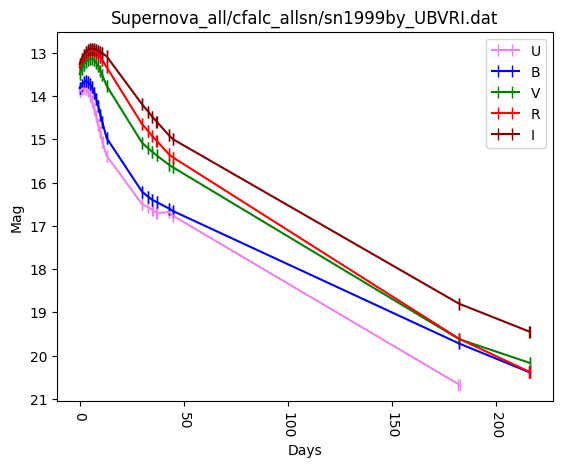

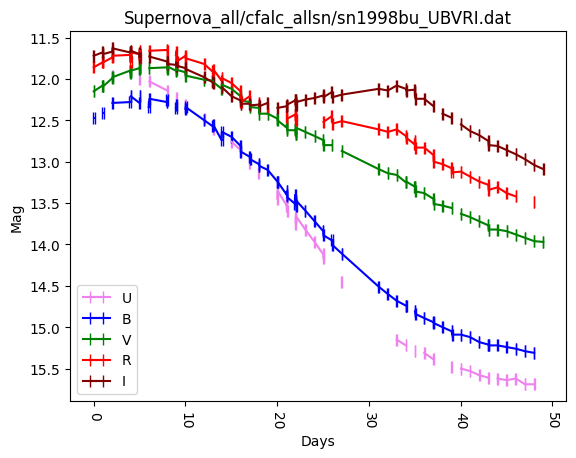

In [15]:
import glob

dataset = glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat")

for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")

            '''
            # Adjust HJD if it's smaller than 2450000
            if df["HJD"].iat[0] < 2450000:
                df["HJD"] += 2450000

            for i in df["HJD"].index:
                df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]
            '''

            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]
            
            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

            plt.title(file)
            plt.xlabel("Days")
            plt.ylabel("Mag")
            plt.xticks(rotation=270)
            plt.legend()
            plt.gca().invert_yaxis()

            # Show the plot (or save it with plt.savefig("filename.png") if preferred)
            plt.show()
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")


## All SNe in a single plot for each filter
Now we made a plot containing every SNe lightcurve for each filter, starting at the point of peak luminosity luminosity.

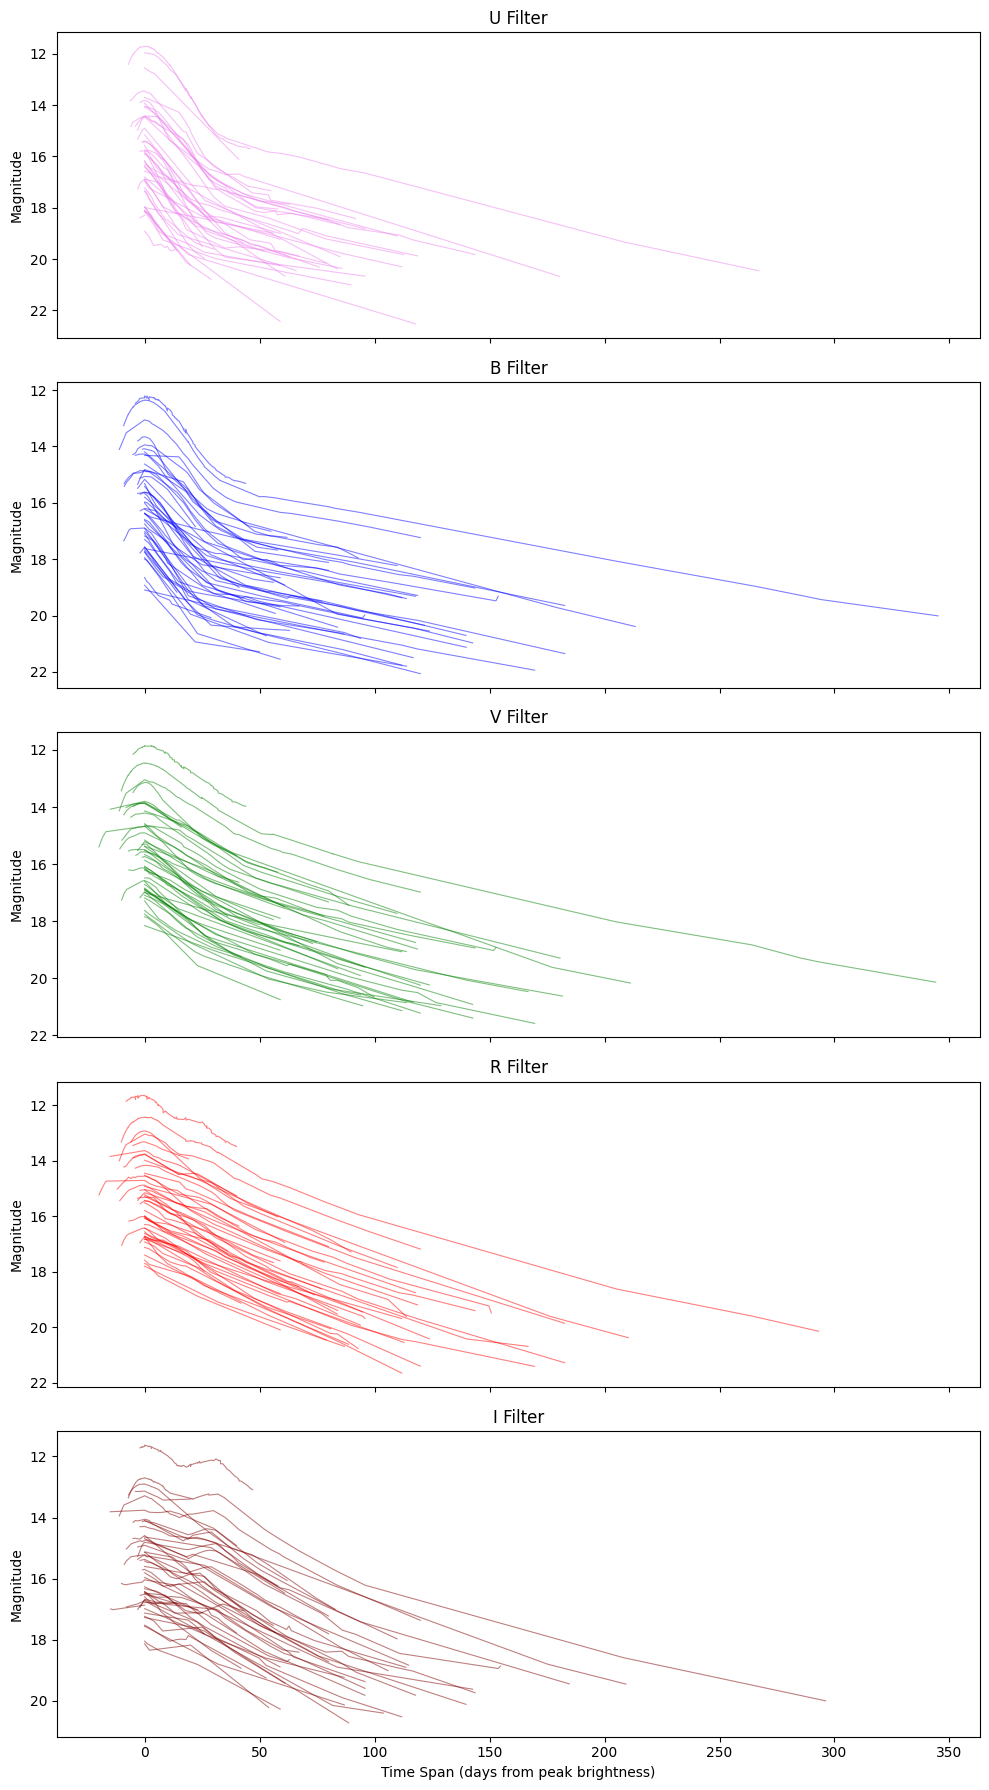

In [9]:
# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Loop through each filter and adjust the time span to start at peak brightness
        for filter in ["U", "B", "V", "R", "I"]:
            # Drop NaN values to avoid issues with finding the minimum
            filter_data = df[['HJD', filter]].dropna()

            # Check if data exists for this filter
            if not filter_data.empty:
                # Find the time (HJD) of peak brightness (minimum magnitude)
                peak_time = filter_data.loc[filter_data[filter].idxmin(), "HJD"]

                # Calculate the time span relative to the peak brightness
                adjusted_time_span = filter_data["HJD"] - peak_time

                # Store the adjusted time span and magnitudes for this supernova
                all_filters_data[filter].append({
                    "Time_Span": adjusted_time_span.values,
                    "Mag": filter_data[filter].values
                })
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up colors for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.5, linewidth=0.8)
    axs[i].set_ylabel("Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days from peak brightness)")

# Adjust layout
plt.tight_layout()
plt.show()


We can obviously see that the brightness of every SNe is decreasing over time. However, there are some interesting patterns where in some curves the brightness peaks again after a few days. This could be because of an attribute of SNe Type IIb that show this pattern of two peaks in their lightcurve.

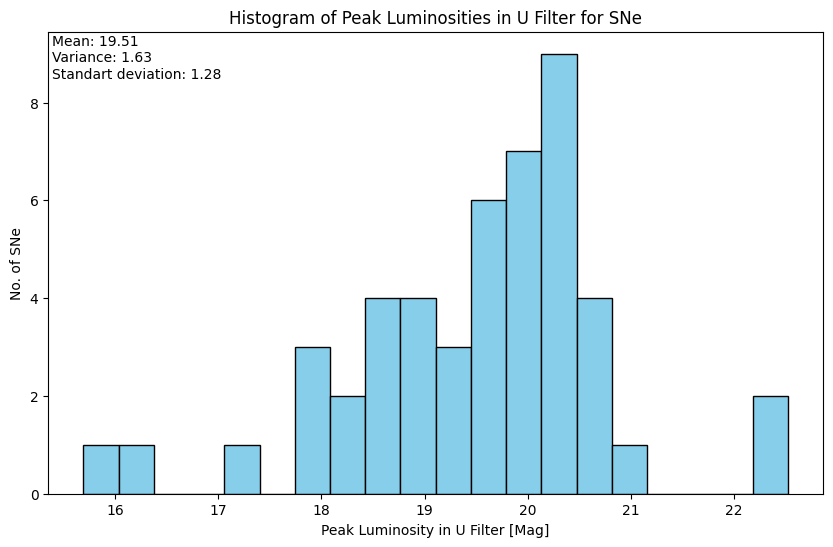

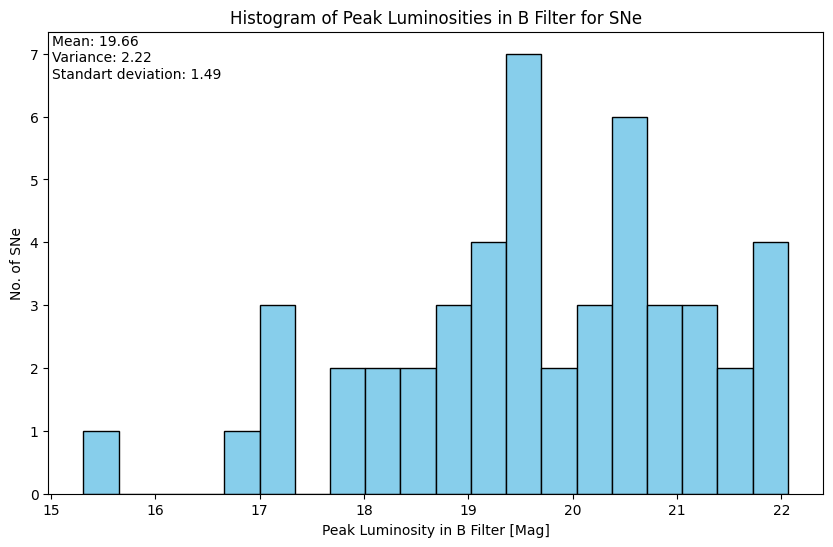

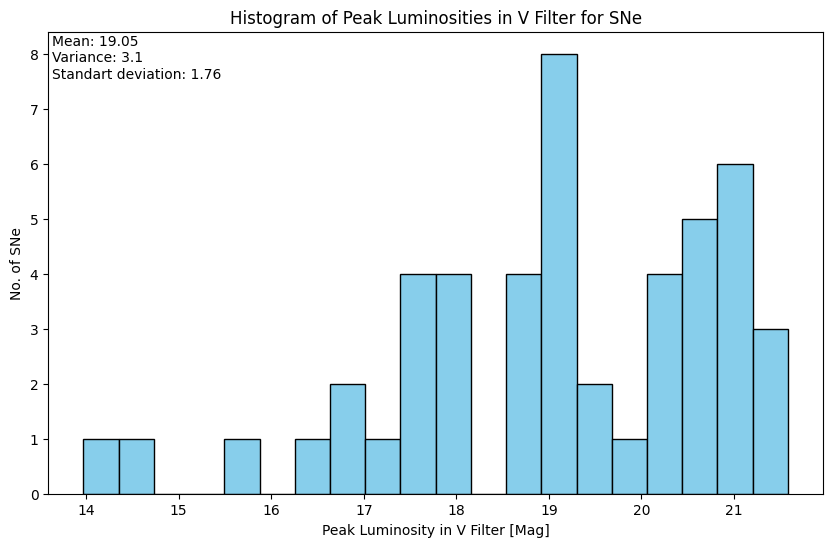

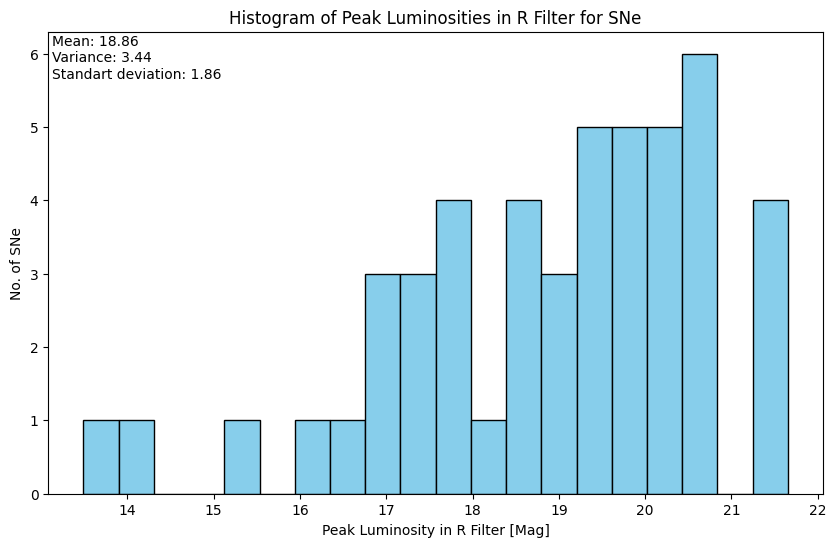

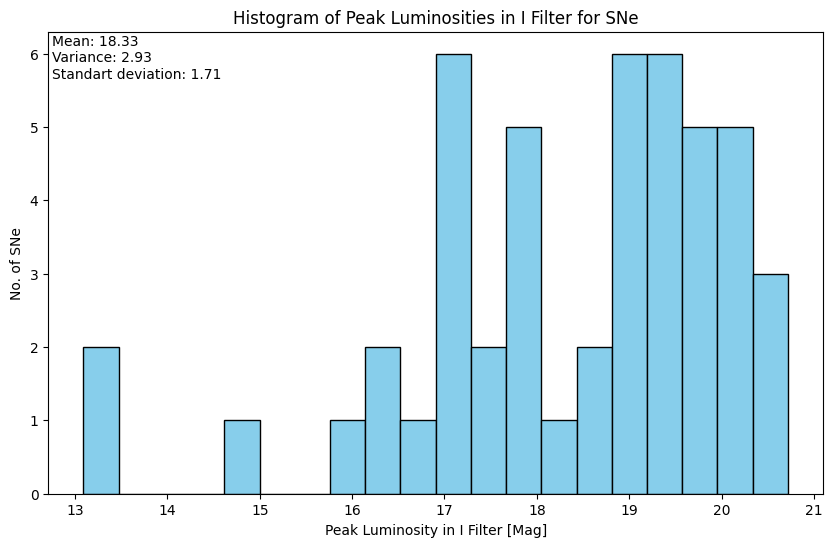

In [17]:
import numpy as np

u_list = []
b_list = []
v_list = []
r_list = []
i_list = []
filters = [["U",u_list], ["B",b_list], ["V",v_list], ["R",r_list], ["I",i_list]]


for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, 
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        for f,d in filters:
            peak_lum = df[f].max()
            d.append(peak_lum)
        
        
    except Exception as e:
        #print(f"{file} ignored due to error: {e}")
        pass


for f,d in filters:
    mean_lum = round(np.mean(d), 2)
    var_lum = round(np.var(d), 2)
    std_lum = round(np.std(d), 2)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(d, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'Peak Luminosity in {f} Filter [Mag]')
    plt.ylabel('No. of SNe')
    plt.title(f'Histogram of Peak Luminosities in {f} Filter for SNe')
    plt.text(0.005 , 0.9 , f'Mean: {mean_lum} \nVariance: {var_lum} \nStandart deviation: {std_lum}', 
             transform=plt.gca().transAxes )
    plt.show()

At last we made a histogram for peak luminosities of all SNe lightcurves. However, we can't really do much with this information. As we have every type of SNe in the data and each of them has a different characteristic lightcurve, we cannot compare them to each other without knowing the type of SN. Another problem is, that this is only the apparent magnitude and it depends on how far away the SN is to find out the absolute magnitude.

### References

1. UBVRI light curves of 44 type Ia supernovae (2006), Jha S. , Kirshner R.P., Challis P. et.al
2. Type Ia Supernova Explosions in Binary Systems: A Review (2023), Zheng-Wei Liu, Friedrich K. Röpke, Zhanwen Han